# Using Jupyter notebooks in the GLAM Workbench

The GLAM Workbench includes many [Jupyter notebooks](https://jupyter.org/). Jupyter lets you combine text, images, and live code within a single web page. So not only can you read about collections data, you can download it, analyse it, and visualise it &ndash; all within your browser!

While the notebooks often include some fairly intimidating looking code, you don't need to understand the code to use them. As explained below, there's just a couple of basic conventions you need to keep in mind when running Jupyter notebooks. Once you've mastered these, you'll be able to use any of the tools or examples in this workbench.

Of course, once you've developed a bit of confidence, you might want to start playing around with the code. That's how you learn. The GLAM Workbench isn't just a collection of tools, it's a starting point – from here you can explore, extend, and experiment!

## Running code in a notebook

Most of the notebooks in the GLAM Workbench include snippets of real code. You can use this code to do things like download data, or create charts. The programming language used here is [Python](https://www.python.org/). It's popular in the data sciences and is generally pretty easy for humans to understand. 

The code in Jupyter notebooks is contained in cells, or boxes, on the page – you can identify code cells by the borders around them. 

To run code snippets:

1. Click on the code cell (you'll see the cell becomes highlighted).
2. Hit **Shift+Enter** (the code will run and you'll be moved on to the next cell).

That's it – try it with the cell below!

In [19]:
# CLICK ON ME AND THEN HIT SHIFT+ENTER!

# This makes the datetime module available to use
import datetime

# This creates a variable called 'date_now' and uses the datetime.date.today() function to set it to today's date.
date_now = datetime.date.today()

# This displays a nicely-formatted string containing the date
print(f'Congratulations! You ran the code in this cell on {date_now}')

# Hey! Have you noticed that lines starting with '#' are comments? They can help you understand what's going on in the code.

Congratulations! You ran the code in this cell on 2019-11-12


<div class="alert alert-block alert-info">
    <p><b>Help! Nothing happens when I click!</b></p>


If nothing happens when you click on a cell or hit **Shift+Enter** it's probably because you're viewing a static version of the notebook. See <a href="1-Introduction-and-table-of-contents.ipynb">Introduction</a> for setting up a live version.

</div>

You can also run the code in a highlighted cell by clicking on the 'Run' icon in the toolbar, or by hitting **Control+Enter**. You'll notice that **Shift+Enter** runs the code and moves you on to the next cell, while **Control+Enter** leaves you where you are.

Any variables or functions defined within a cell are made available to the rest of the notebook when you run it. In the cell above, we created a variable called `date_now`. Let's try using it in another cell. Just click on the cell below and hit **Shift+Enter** to extract the year component of `date_now`.

In [20]:
# Run me to see how we can access the 'date_now' variable

# This gets the year from the date stored in the date_now variable.
date_now.year

2019

<div class="alert alert-block alert-info">
    <p><b>Help! I get a weird 'Name Error' saying that 'date_now is not defined.</b></p>
    <p>If you get a message about a NameError, make sure that you've run the first code cell (where we create the 'date_now' variable, before this one. Most Jupyter notebooks expect you to run cells in order, from top to bottom.</p>

</div>

Some of the notebooks in this workbench include many code cells defining functions and setting up variables for later use. Just run the cells in the order they appear to make sure that everything works as expected. If you get an error, check back to make sure all the relevant cells have been executed.

You might have noticed that after a cell has been run a number appears in the square brackets &ndash; `[ ]:`. This helps you keep track of which cells have been executed. While the code in a cell is running you'll see an asterix &ndash; `[*]:`. This changes to a number once the code has completed.

In some cases, cells will start processes that take a bit of time to complete. For example, harvesting series data from RecordSearch can take lots of time depending on how big the series is. You won't be able to run any more cells until the current one has finished. Just wait for the asterix to turn into a number and you'll be right to move on.

## Adding and editing cells to a notebook

In many places throughout this workbench, you'll be asked to edit or add to the code. By doing that you can customise the code to your own research interests. Just click on any code cell to start editing. Try it in the cell below! 

1. Click on the cell to select it.
2. You'll see the cursor turns into a normal text cursor. Just select `Tim` in the code below and type in your own name. Keep the quotes around your name.
3. When you've finished editing, hit **Shift+Enter** to run the cell.

In [21]:
# Edit this cell to add your name between the quotes, and then run it
your_name = 'Tim' # <-- EDIT ME!

print('Hi {}! Welcome to the OzGLAM workbench. 👋'.format(your_name))

Hi Tim! Welcome to the OzGLAM workbench. 👋


<div class="alert alert-block alert-info">
    <p><b>Help! I get a weird 'SyntaxError' or 'Name Error'.</b></p>
    <p>Make sure your name is enclosed in quotes (either single or double, as long as they match). Quotes indicate that you're working with a string or text value. Without them, Python will go looking for a variable with your name!</p>

</div>

To add a new cell, you just click the **+** icon in the toolbar at the top of the page. By default, the new cell will be expecting code, but if you want to add text (like this) just select 'Markdown' from the dropdown list of types in the toolbar. Here's some more information on [formatting markdown cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

## Let's try getting some data

Once you know how to run and edit cells, you can start to do all sorts of interesting things – such as getting collection data from the National Museum of Australia!

The NMA makes its collection data available [through an API](https://www.nma.gov.au/about/our-collection/our-apis) (Application Programming Interface). This means we can fire off queries and get results back in a structured form that we can process and analyse. To do this, we'll make use of [Requests](https://requests.kennethreitz.org/en/master/) – the go-to Python package for moving data around on the web.

Let's try searching for a keyword in the NMA collections:

1. Click on the cell below to select it.
2. Look for the line starting with `keyword`, replace the value in quotes with anything you'd like to find in the NMA collection. Keep the quotes around the value.
3. Hit **Shift+Enter** to run the cell and get some data.
4. If your keyword can't be found, you'll see something like `data: []` – indicating that the list of results is empty. Just change the keyword value and try again.

In [22]:
# This is how we import an external package or library into Python
import requests

keyword = 'stone' # <-- EDIT ME! (But leave the quotes)

# This is the base url we use to send our search terms to the NMA API
# The limit=1 tells the API we only want one record -- try changing it to see what happens!
url = 'https://data.nma.gov.au/object?limit=1&text='

# We combine our keyword with the base url and send our query off to the API
response = requests.get(url + keyword)

# We extract the results as JSON
results = response.json()

# Display the results
results

{'data': [{'id': '53703',
   'type': 'object',
   'additionalType': ['Stone artefacts'],
   'title': 'Stone blade [stone implement]',
   'collection': {'id': '1917',
    'type': 'Collection',
    'title': 'Professor Henry and Luise Krips collection'},
   'identifier': '1993.0047.0169',
   'medium': [{'type': 'Material', 'title': 'Stone - non specific'}],
   'extent': {'type': 'Measurement',
    'length': 140,
    'height': 20,
    'width': 40,
    'unitText': 'mm'},
   'physicalDescription': 'A stone flake blade.',
   'significanceStatement': 'The Professor Henry and Luise Krips collection comprises 260 Aboriginal artefacts including weapons, ornaments and stone implements.\n\nThe Professor Henry and Luise Krips collection comprises a wide range of artefacts from all mainland states and the Northern Territory. Henry Krips was a symphony orchestra director and his work often took him and his wife Luise to Europe and Great Britain where they would purchase artefacts for their collection 

The data arrives back in a standard format known as [JSON](https://en.wikipedia.org/wiki/JSON) (JavaScript Object Notation). The main things to notice are that it contains labels and values, and these labels and values are arranged in some sort of hierarchy. If we understand the hierarchy, we can get back the value for any label – it's just a matter of following the path through the hierarchy until we get to the value we want. For example, here's how we get the value for `title`.

In [23]:
# RUN THIS CELL to get the value of `title`
results['data'][0]['title']

'Stone blade [stone implement]'

The `[0]` says that we want the first record contained within the result data (although in this case there's only one anyway).

You might also notice that `meta` includes a `total` value that tells us the total number of results matching our keyword. Here's how we get the to the `total` value.

In [24]:
# RUN THIS CELL to get the number of search results
results['meta']['results']

7093

## Let's make a dataset

We made one request to the API and found out the number of items matching our keyword. By repeating this process multiple times with different keywords, we can start building up a picture of the NMA's holdings.

Instead of defining a single `keyword` value, we'll create a list of `keywords`. Lists in Python are contained within square brackets. We'll loop through the list of keywords, getting the total number of results for each. Then we'll use [Pandas](https://pandas.pydata.org/), the all-purpose (and frighteningly powerful) data analysis package, to convert our data into a dataframe. Dataframes come with with all sorts of useful built-in methods for shaping and analysing data. 

1. Look for the line `keywords = ['cat', 'dog', 'kangaroo', 'koala']` in the cell below – this creates a list of keyword values.
2. Edit the list – feel free to add, remove, or edit any of the keywords, but keep the quotes around each value. You can include as many keywords as you want.
3. Run the cell to retrieve the data. Depending on how long your list is, it might take several seconds to complete. Pandas will display the results in a nicely-formatted table.

In [25]:
# By convention pandas is assigned the shorthand 'pd' when we import it
import pandas as pd
import time

# The square brackets indicate that this is a list of values
# Change or add values as you wish!
keywords = ['cat', 'dog', 'kangaroo', 'koala'] # <-- EDIT ME!

# This is an empty list to put our data in
totals = []

# We're going to loop through the keywords one at a time
for keyword in keywords:
    
    # This is the same code we used above
    # Now it's in a loop, so it gets repeated multiple times
    response = requests.get(url + keyword)
    data = response.json()
    total = data['meta']['results']
    
    # Now we'll save the keyword and the total results to our list
    totals.append({'keyword': keyword, 'total': total})
    
    # Anonymous access to the NMA API has usage limits -- here we put in a pause of 1 second to stay within the limits.
    time.sleep(1)

# Now we'll convert our raw data into a Pandas dataframe
# Dataframes come with all sorts of useful methods for analysing/shaping data
df = pd.DataFrame(totals)

# Display the dataset
df

,keyword,total
0,cat,93
1,dog,143
2,kangaroo,791
3,koala,246


Our dataset is tiny, so it's easy to see what's going on. If you have lots of data, Pandas can help you make sense of it. For example, we might want to find the keyword with the highest number of results.

In [26]:
# RUN THIS CELL to find which row has the largest value
df.loc[df['total'].idxmax()]

keyword    kangaroo
total           791
Name: 2, dtype: object

Or perhaps you'd like to know the total number of search results across all keywords. 

In [37]:
# RUN THIS CELL to get the sum of all values
df['total'].sum()

1273

These are just a couple of examples of how Pandas helps you work with tabular data. There are many more throughout the GLAM workbench!

## Let's try visualising our dataset

We've displayed our data as a table, but a chart would be easier to interpret at a glance. There are a number of charting and data visualisation packages available for Python, here we'll be using [Altair](https://altair-viz.github.io/). You just feed Altair a dataframe, and tell it the columns to display on each axis. Let's start with a simple bar chart that shows the keywords along the `x` axis, and the number of search results on the `y` axis.

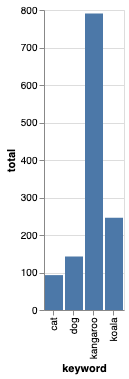

In [36]:
# If you're using Jupyter notebook rather than Jupyter Lab,
# remove the '#' from the next line.
alt.renderers.enable('notebook')

import altair as alt

alt.Chart(df).mark_bar().encode(
    x='keyword:N',
    y='total:Q'
)

<div class="alert alert-block alert-info">
    <p><b>Help! I get a weird message about 'Vegalite'.</b></p>
    <p>If you're using Altair in Jupyter Notebook rather than Jupyter Lab, you need to make an adjustment to the code above. Just remove the '#' from the line beginning 'alt.renderers.enable' and run the cell again.</p>

</div>

Altair is easy to customise. Here's a few things you could try:

* Switch the `x` and `y` values in the code above and see what happens.
* Change `mark_bar` to `mark_line`.

## We'd better save our dataset for later

Many of the notebooks in the GLAM Workbench help you harvest data from GLAM collections, just as we did above. Once you've created a new dataset, you'll probably want to save it. Pandas makes it easy to save your dataframe as a [CSV (Comma Separated Values)](https://en.wikipedia.org/wiki/Comma-separated_values) file. CSV files are simple text files that can be opened by any spreadsheet program. They're widely used for storing and sharing datasets.

In [38]:
# RUN THIS CELL to save your dataset as a CSV file
df.to_csv('my_nma_dataset.csv', index=False) # <-- EDIT ME if you'd prefer a different filename

Once you've created your CSV file you can download it from Jupyter to your local computer. If you're using Jupyter Lab, the file should pop up in the file list. Just right click on it and choose 'Download'. If you're using the classic Jupyter Notebook, select the CSV file in the dashboard and click on the 'Download' button.

## What have you learnt?

This notebook has introduced you to the basics of Jupyter. You've learnt how to run and edit cells, but you've also harvested some data from an API, created a dataset, visualised the dataset, and saved it as a CSV file. As you work through the GLAM Workbench you'll find yourself repeating this sort of pattern – getting, analysing, and saving data. You've also met some important tools like Requests, Pandas, and Altair. Once again you'll find them popping up all over the place. The examples used in this notebook might have been pretty simple, but they provide a good introduction to what the GLAM Workbench is all about.